In [11]:
import pandas as pd
import requests 
from datetime import datetime

In [2]:
crime_df = pd.read_csv("CSVs/Crime_Data_from_2010_to_Present.csv")

In [3]:
crime_df = crime_df.dropna(subset= ["Location "])

In [95]:
crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Dates
44,130100569,01/22/2013,01/21/2013,1055,1,Central,147,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2004 0416,...,IC,Invest Cont,230.0,NaN,NaN,NaN,4TH,SAN PEDRO,"(34.0458, -118.243)",2013-01-21
46,130100572,01/22/2013,01/21/2013,2015,1,Central,166,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 2004,...,IC,Invest Cont,230.0,NaN,NaN,NaN,7TH,WALL,"(34.0412, -118.2474)",2013-01-21
54,130100622,02/04/2013,02/04/2013,2115,1,Central,182,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0419 0429 0447 0417 0319 0416,...,AO,Adult Other,230.0,NaN,NaN,NaN,1200 S FLOWER ST,NaN,"(34.0415, -118.2654)",2013-02-04
56,130100632,02/08/2013,02/08/2013,1700,1,Central,185,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1402 0917 0601 0432 0416 0419,...,IC,Invest Cont,230.0,998.0,NaN,NaN,300 E 12TH ST,NaN,"(34.0363, -118.2573)",2013-02-08
67,130100657,02/17/2013,02/16/2013,1520,1,Central,192,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0345 0429,...,AO,Adult Other,230.0,999.0,NaN,NaN,1300 S OLIVE ST,NaN,"(34.0381, -118.2629)",2013-02-16


In [4]:
crime_df = crime_df.loc[crime_df["Crime Code Description"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT", :]

In [60]:
crime_df['Date Occurred'] > "08"

'01/21/2013'

In [5]:
New_Date = []

for item in list(crime_df['Date Occurred']):
    
    New_Date.append(datetime.strptime(item, '%m/%d/%Y'))


In [6]:
crime_df["Dates"] = New_Date

In [11]:
crime_df = crime_df.loc[crime_df["Dates"] > "2017-05-01", :]

In [12]:
Latitude= []
Longitude= []

for element in list(crime_df["Location "]):
    element = element.strip("(")
    element = element.strip(")")
    thing = element.split(',')
    Latitude.append(thing[0].strip())
    Longitude.append(thing[1].strip())
        
print(Latitude[0])

print(Longitude[0])

Lati = [float(x) for x in Latitude]
Long = [float(x) for x in Longitude]

34.0455
-118.2452


In [13]:
len(Lati)

11160

In [14]:
location = pd.DataFrame({"Lati": Lati, "Long": Long})
location = location.loc[location["Lati"] != 0.0, :]
location = location.loc[location["Lati"] > 33.8, :]
location = location.loc[location["Lati"] < 34.15, :]
location = location.loc[location["Long"] < -118.15, :]
location

,Lati,Long
0,34.0455,-118.2452
1,34.0453,-118.2443
2,34.0467,-118.2485
3,34.0449,-118.2415
4,34.0481,-118.2507
5,34.0491,-118.2558
7,34.0408,-118.2428
8,34.0421,-118.2469
9,34.0408,-118.2428
10,34.0392,-118.2328


In [12]:
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

/Users/AlexMac/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py:841: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


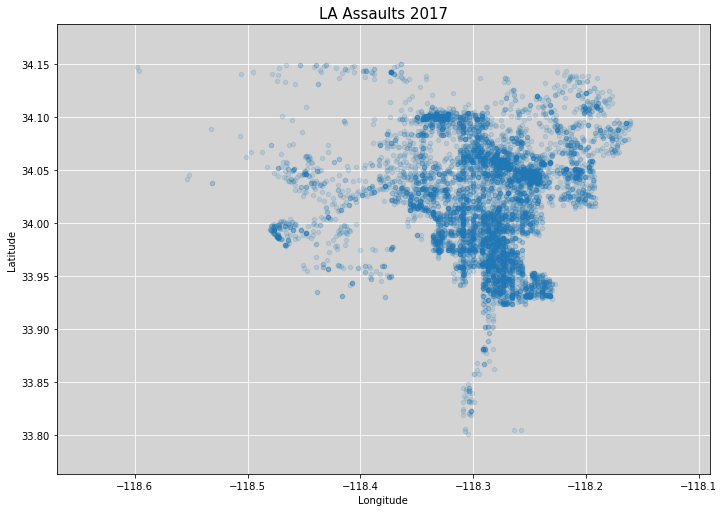

In [15]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
ax.set_axisbelow(True)
ax.grid(b=True, which='major', color = "white")
ax.grid(b=True, which='minor')
ax.set_title("LA Assaults 2017", fontsize = 15)

plot = sns.regplot(x="Long", y="Lati", data = location, scatter_kws={"s": 20, 'alpha':0.15}, fit_reg=False)
plot.set(axis_bgcolor='lightgrey')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("Graphs/LA_Assault_Locs.png")

plt.show()

In [17]:
location.to_csv("CSVs/crime_location.csv")